### References:
<b><ol><li>https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/linear_regression.py</li>
<li>https://www.youtube.com/watch?v=4swNt7PiamQ </li></ol></b>

### Linear Regression from scratch

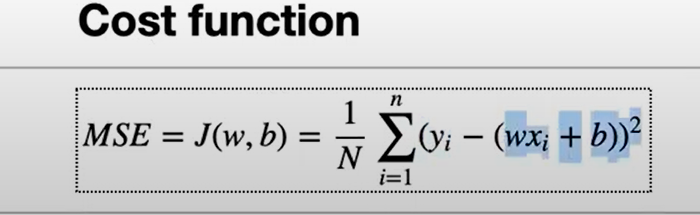

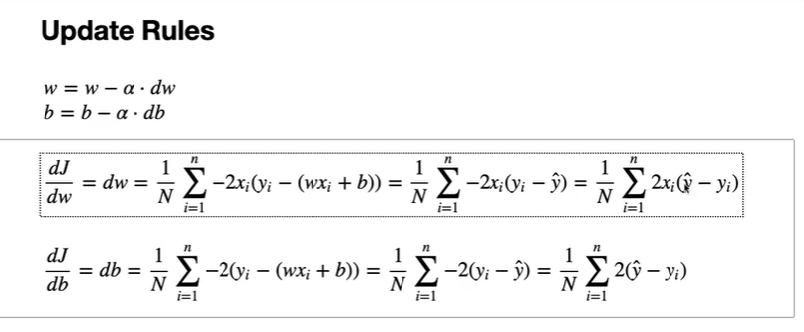

In [1]:
import numpy as np

In [37]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    # gradient descent implementation
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            # Hypothesis function for prediction
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # we transpose in following because we need the output count similar to the number of features
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))  
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X,  self.weights) + self.bias
        return y_predicted

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [44]:
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [57]:
X.shape[1]

2

### Plot features against target variable

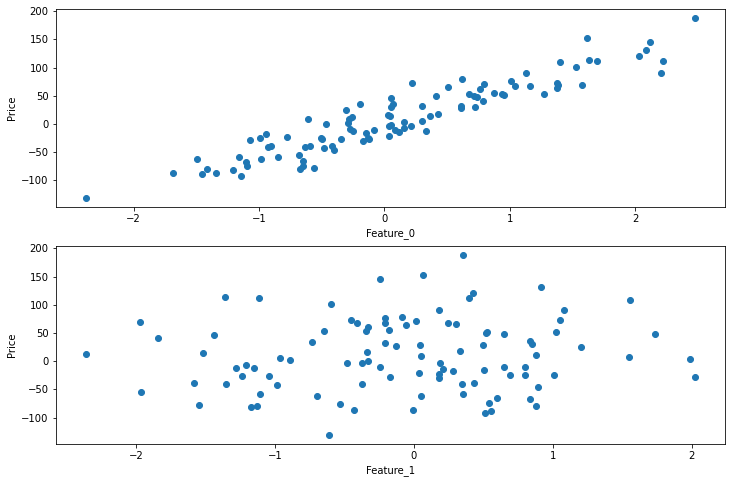

In [61]:
fig, ax = plt.subplots(X.shape[1], figsize=(12, 8))
for i in range(X.shape[1]):
    ax[i].scatter(x=X[:, i], y = y)
    ax[i].set_xlabel("Feature_"+ str(i))
    ax[i].set_ylabel("Price")
plt.show()

### Train the Model

In [45]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predicted_values = regressor.predict(X_test)

### Evaluate the model using MSE (Mean-Squared Error)
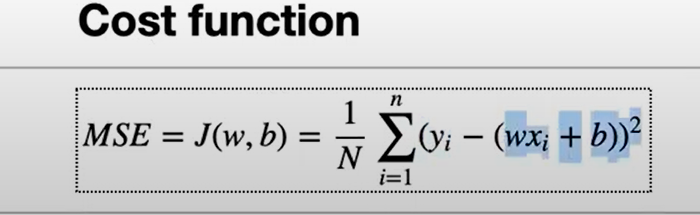

In [46]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [47]:
mse_value = mse(y_test, predicted_values)

In [48]:
mse_value

539.0333619851364